In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

In [3]:
# 다층 퍼셉트론(Multilayer Preceptrons)

# 비선형 함수인 렐루 (ReLU)와 하이퍼볼릭 탄젠트(tanh)를 사용하여 은닉층을 구성하면 선형모델에서 보다 훨씬 더 정교한 함수를 만들 수 있음
# 은닉층의 비선형 함수는 잘 모르면 그냥 ReLU 를 사용 하라는 말이 있을 정도로 ReLU가 많이 쓰인다.
# sigmoid(시그모이드) 와 그 파생형인 tanh(탄젠트) 함수는 기울기 손실이 발생 한다.

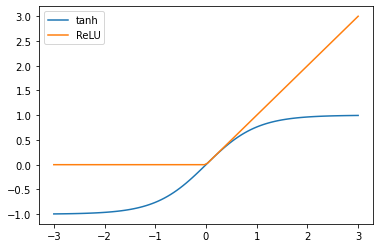

In [10]:
# ReLU 함수와 tanh 함수 구현

line = np.linspace(-3,3,100)

plt.plot(line, np.tanh(line), label = 'tanh')
plt.plot(line,np.maximum(line,0),label='ReLU')
plt.legend(loc='best')

Text(0, 0.5, 'Feature 2')

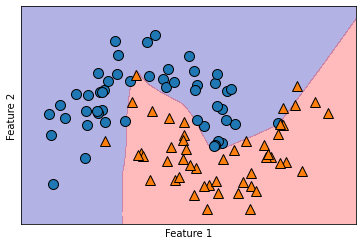

In [29]:
#Two_moon 데이터셋
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25 ,random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,random_state=42)

#MLP 모델 생성
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train, y_train) # 기본 hidden_layer 값은 100

mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True, alpha=0.3)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

Text(0, 0.5, 'Feature 2')

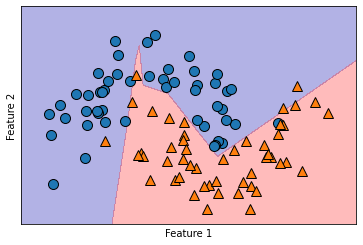

In [21]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10],max_iter=1000).fit(X_train, y_train) # 기본 hidden_layer 값은 100

mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True, alpha=0.3)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

#hidden_layer의 첫번쩨 인자는 은닉층의 노드갯수 이고 두번째 인자는 은닉층의 갯수이다.
# hidden_layer 값을 10으로 줄였더니 경계가 날카로워 졌다.
# 직선 10개로만 구성된 결과

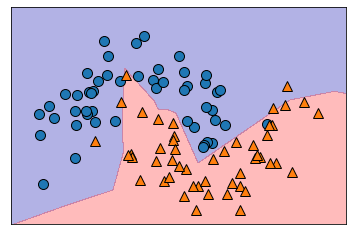

In [27]:
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=[10,10],random_state=0, max_iter=1000)

#solver는 경사하강법의 알고리즘을 선택하는 옵션이다.
#activation함수의 기본값은 ReLU이다.
mlp.fit(X_train,y_train)

mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

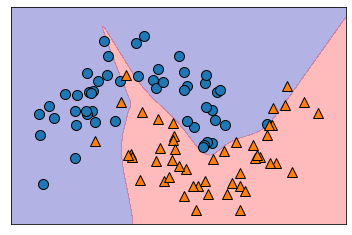

In [31]:
#tanh 함수 사용
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=[10,10],random_state=0, max_iter=1000,activation='tanh')
mlp.fit(X_train,y_train)

mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

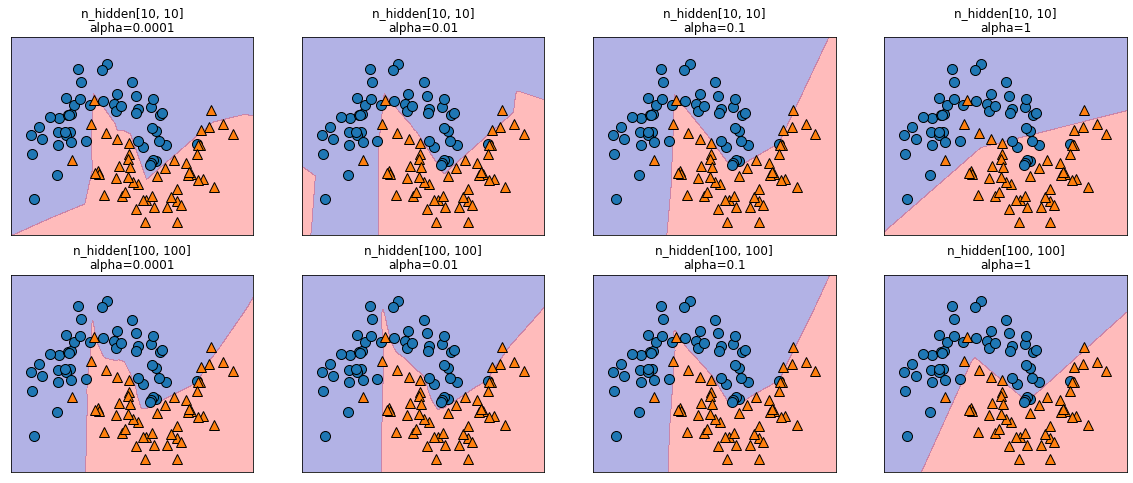

In [34]:
#alpha변수를 사용하여 각 은닉층의 규제 정도값을 정할 수 있다.

fig, axes = plt.subplots(2,4,figsize=(20,8))

for axx, n_hidden_nodes in zip(axes,[10,100]): # 은닉층의 노드갯수 설정
    for ax, alpha in zip(axx, [0.0001,0.01,0.1,1]):
        mlt = MLPClassifier(solver='lbfgs',hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha=alpha
        , random_state=0, max_iter=1000)
        mlt.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlt, X_train, fill=True, alpha=0.3,ax=ax)
        mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
        ax.set_title("n_hidden[{}, {}]\nalpha={}".format(n_hidden_nodes,n_hidden_nodes,alpha))
        

In [48]:
# 유방암 데이터셋

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.data.shape) # 유방암 데이터는 특성이 30개인 데이터
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

# MLP 모델
mlp = MLPClassifier(hidden_layer_sizes=[50,50,50,50],alpha=1
    ,random_state=0).fit(X_train, y_train)
print("MLP Training: ",mlp.score(X_train, y_train))
print("MLP Test: ",mlp.score(X_test, y_test))

# RF 모델
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000, random_state=0).fit(X_train,y_train)
print("RF Training: ",forest.score(X_train, y_train))
print("RF Test: ",forest.score(X_test, y_test))

# hidden_layer_sizes 를 여러 조합으로 해본 결과 랜덤포레스트의 성능이 더 좋다.
# Random Forest의 앙상블 기법이 간단하지만 아주 강력한것 같다.

(569, 30)
MLP Training:  0.931924882629108
MLP Test:  0.958041958041958
RF Training:  1.0
RF Test:  0.972027972027972


In [53]:
# 유방암 데이터의 스케일 조정
# 신경망의 입력특성이 mean(평균)은 0, Variance(분산, 오차제곱의 평균)은 1이 되면 정확도가 상승한다.

print("유방암 데이터 특성들의 최댓값:\n",cancer.data.max(axis=0)) # e-01 ~ e+02 데이터의 범위가 특성마다 다르다.

mean_on_train = X_train.mean(axis=0) #평균
std_on_train = X_train.std(axis=0) #표준편차

# 표준화 공식: (Data - mean)/표준편차, 증명은 생략
X_train_scaled =(X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("MLP Training: ",mlp.score(X_train_scaled, y_train))
print("MLP Test: ",mlp.score(X_test_scaled, y_test))
print("RF Training: ",forest.score(X_train, y_train))
print("RF Test: ",forest.score(X_test, y_test))

# 데이터 스케일링(표준화) 결과 성능이 RandomForest 보다 좋아졌다.
# 이후에는 StandardSclaer 함수를 사용
# Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet
# 모델을 학습시키는 adam 알고리즘에 관한것 으로 반복횟수를 늘려야 한다.

유방암 데이터 특성들의 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


C:\Users\wlsgh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Training:  0.9929577464788732
MLP Test:  0.986013986013986
RF Training:  1.0
RF Test:  0.972027972027972


In [54]:
mlp = MLPClassifier(random_state=0,max_iter=1000)
mlp.fit(X_train_scaled, y_train)

print("MLP Training: ",mlp.score(X_train_scaled, y_train))
print("MLP Test: ",mlp.score(X_test_scaled, y_test))

# max_iter 값을 조정한 결과 훈련집합 데이터의 정확도가 더 올랐다.

MLP Training:  0.9976525821596244
MLP Test:  0.972027972027972
